In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from transformers import AutoModelForSequenceClassification, AutoTokenizer, pipeline
from cf_matrix import make_confusion_matrix
from IPython.display import clear_output

def split(df, need_emoji = True):
    if need_emoji:
        X = list(df['review'])
    else:
        X = list(df['no_emoji_review'])
    y = list(df['label'])
    # 80% train, 10% development, 10% test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
    X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 0)
    return X_train, X_val, X_test, y_train, y_val, y_test

def performance(X_test, y_test, classifier):
    convert = {'positive (stars 4 and 5)': 1, 'negative (stars 1, 2 and 3)': 0}
    #y_pred = [convert[classifier(review)[0]['label']] for review in X_test]
    y_pred = []
    for review in X_test:
        y_pred.append(convert[classifier(review)[0]['label']])
        clear_output(wait = True)
        print("{}/{}".format(len(y_pred), len(y_test)))
    cf_matrix = confusion_matrix(y_test, y_pred)
    labels = ['TN', 'FP', 'FN', 'TP']
    categories = ['Negative', 'Positive']
    make_confusion_matrix(cf_matrix, group_names = labels, categories = categories, cmap = 'binary')

In [2]:
df = pd.read_csv('Data/processed_data.csv')
df = df.dropna()
df = df.drop("Unnamed: 0", axis = 1)
print(df.shape[0])
df.head()

471563


,label,review,has_emoji,emojis,no_emoji_review
0,1,﻿更博了，爆照了，帅的呀，就是越来越爱你！生快傻缺[爱你][爱你][爱你],1,{'[爱你]': 3},﻿更博了，爆照了，帅的呀，就是越来越爱你！生快傻缺
1,1,@张晓鹏jonathan 土耳其的事要认真对待[哈哈]，否则直接开除。@丁丁看世界 很是细心...,1,{'[哈哈]': 1},@张晓鹏jonathan 土耳其的事要认真对待，否则直接开除。@丁丁看世界 很是细心，酒店都...
2,1,姑娘都羡慕你呢…还有招财猫高兴……,0,{},姑娘都羡慕你呢…还有招财猫高兴……
3,1,美~~~~~[爱你],1,{'[爱你]': 1},美~~~~~
4,1,梦想有多大，舞台就有多大![鼓掌],1,{'[鼓掌]': 1},梦想有多大，舞台就有多大!


In [3]:
df_emoji = df[df['has_emoji'] == 1]
X_train_1, X_val_1, X_test_1, y_train_1, y_val_1, y_test_1 = split(df_emoji)
X_train_2, X_val_2, X_test_2, y_train_2, y_val_2, y_test_2 = split(df_emoji, need_emoji = False)

In [4]:
model = AutoModelForSequenceClassification.from_pretrained('uer/roberta-base-finetuned-dianping-chinese')
tokenizer = AutoTokenizer.from_pretrained('uer/roberta-base-finetuned-dianping-chinese')
classifier = pipeline('sentiment-analysis', model = model, tokenizer = tokenizer)

9435/9435


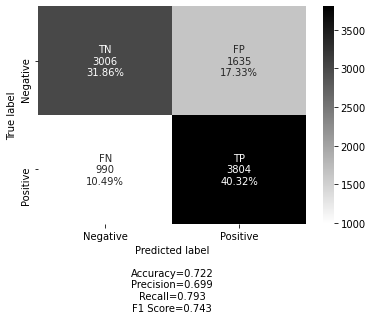

In [5]:
performance(X_test_1, y_test_1, classifier)

9435/9435


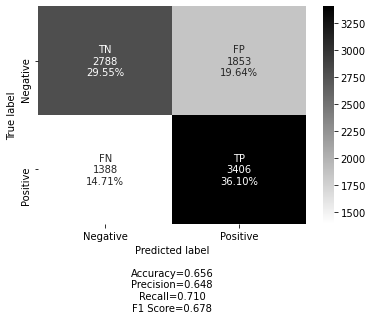

In [6]:
performance(X_test_2, y_test_2, classifier)

In [7]:
model = AutoModelForSequenceClassification.from_pretrained('uer/roberta-base-finetuned-jd-binary-chinese')
tokenizer = AutoTokenizer.from_pretrained('uer/roberta-base-finetuned-jd-binary-chinese')
classifier = pipeline('sentiment-analysis', model = model, tokenizer = tokenizer)

9435/9435


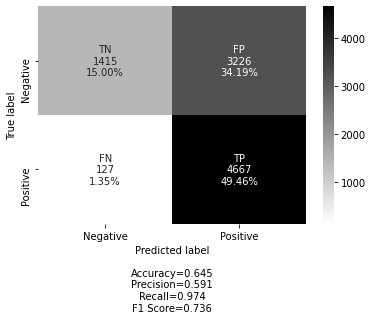

In [8]:
performance(X_test_1, y_test_1, classifier)

9435/9435


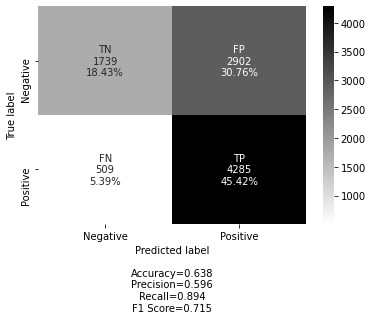

In [9]:
performance(X_test_2, y_test_2, classifier)